### Importação dos dados



In [19]:
import pandas as pd

# URLs dos arquivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Leitura dos dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adiciona coluna de identificação
loja1["loja"] = "Loja 1"
loja2["loja"] = "Loja 2"
loja3["loja"] = "Loja 3"
loja4["loja"] = "Loja 4"

# Junta os dados
dados = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)


# 1. Análise do faturamento


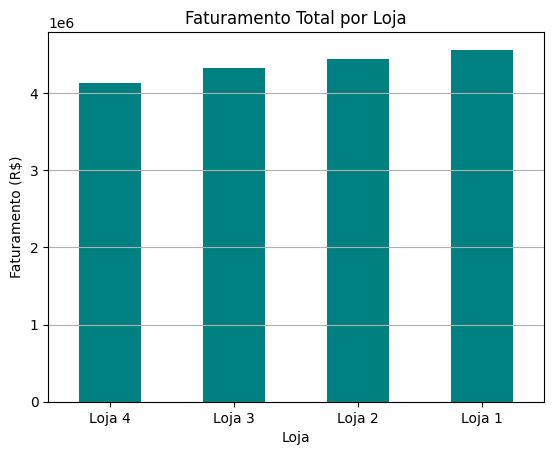

In [21]:
# Cálculo do faturamento
dados["faturamento"] = dados["Preço"] * dados["Quantidade de parcelas"]

# Faturamento total por loja
faturamento = dados.groupby("loja")["faturamento"].sum().sort_values()

# Gráfico
import matplotlib.pyplot as plt

faturamento.plot(kind="bar", title="Faturamento Total por Loja", color="teal")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


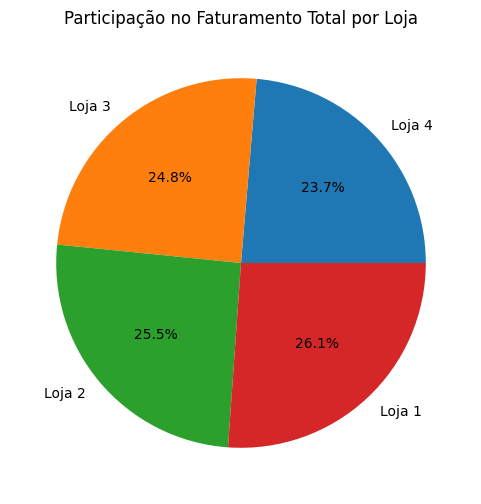

In [37]:
# Gráfico de pizza
faturamento.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6, 6),
    title="Participação no Faturamento Total por Loja",
    ylabel=""  # remove label do eixo y
)
plt.show()


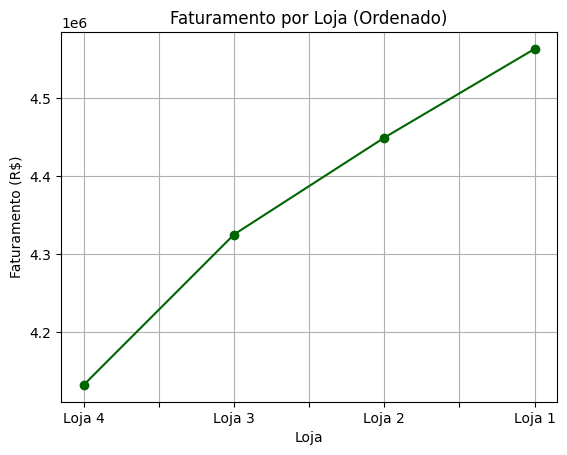

In [36]:
# Gráfico de linha
faturamento.plot(
    kind="line",
    marker="o",
    linestyle="-",
    color="darkgreen",
    title="Faturamento por Loja (Ordenado)"
)
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


# 2. Vendas por Categoria


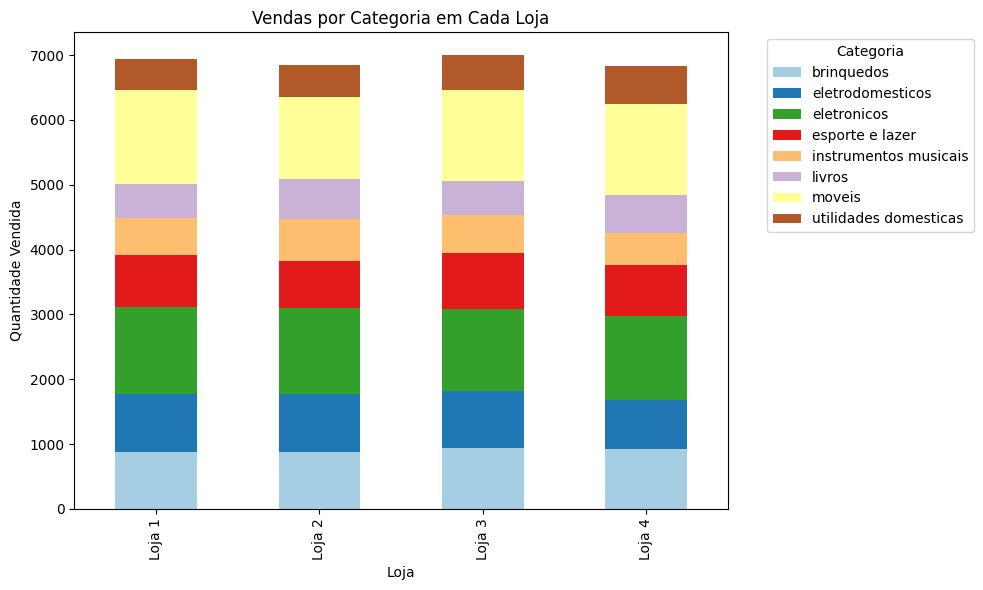

In [32]:
# Agrupa a quantidade vendida por categoria e loja
vendas_categoria = dados.groupby(["loja", "Categoria do Produto"])["Quantidade de parcelas"].sum().unstack()

# Gráfico de barras empilhadas
vendas_categoria.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Paired")
plt.title("Vendas por Categoria em Cada Loja")
plt.xlabel("Loja")
plt.ylabel("Quantidade Vendida")
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [ ]:
# Gráfico de Área

vendas_categoria.plot(kind="area", stacked=True, figsize=(10,6), colormap="Set2", alpha=0.8)
plt.title("Distribuição de Vendas por Categoria nas Lojas (Área)")
plt.xlabel("Loja")
plt.ylabel("Quantidade Vendida")
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [ ]:
# Gráfico de Barras Agrupadas

vendas_categoria.plot(kind="bar", figsize=(10,6), colormap="tab10")
plt.title("Vendas por Categoria em Cada Loja (Barras Agrupadas)")
plt.xlabel("Loja")
plt.ylabel("Quantidade Vendida")
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
# Avaliação média por loja
avaliacoes = dados.groupby("loja")["Avaliação da compra"].mean().sort_values()

# Gráfico
avaliacoes.plot(kind="barh", title="Média de Avaliação das Lojas", color="purple")
plt.xlabel("Avaliação Média")
plt.ylabel("Loja")
plt.grid(axis="x")
plt.show()


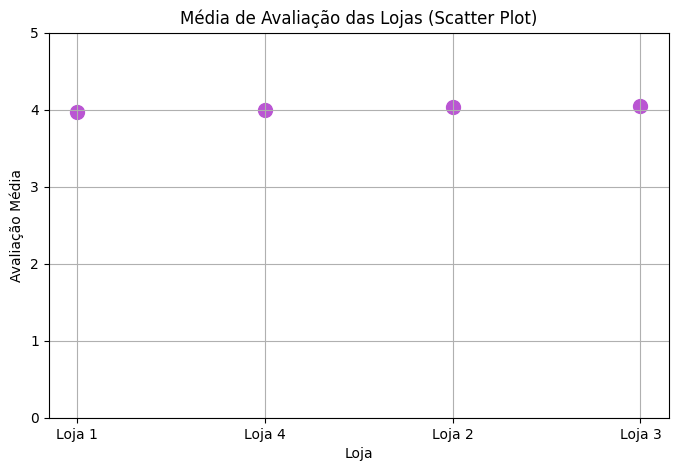

In [41]:
# Gráfico de Pontos

plt.figure(figsize=(8, 5))
plt.scatter(avaliacoes.index, avaliacoes.values, color='mediumorchid', s=100)
plt.title("Média de Avaliação das Lojas (Scatter Plot)")
plt.xlabel("Loja")
plt.ylabel("Avaliação Média")
plt.ylim(0, 5)
plt.grid(True)
plt.show()


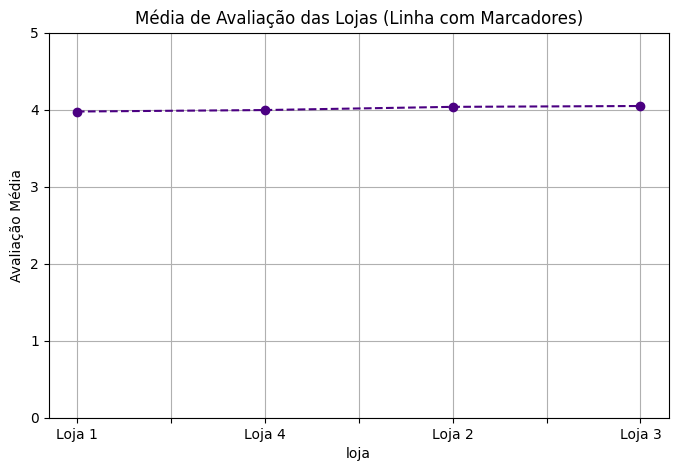

In [43]:
# Gráfico de Linha com Marcadores

avaliacoes.plot(
    kind="line",
    marker="o",
    linestyle="--",
    color="indigo",
    title="Média de Avaliação das Lojas (Linha com Marcadores)",
    figsize=(8,5)
)
plt.ylabel("Avaliação Média")
plt.ylim(0, 5)
plt.grid(True)
plt.show()


# 4. Produtos Mais e Menos Vendidos

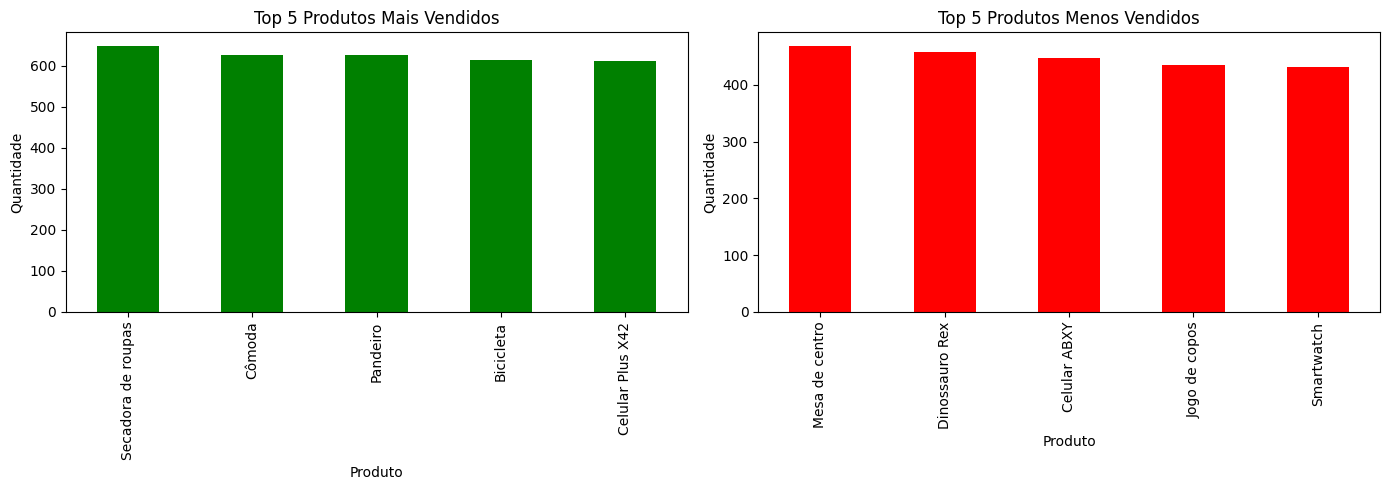

In [34]:
# Total de vendas por produto
vendas_produtos = dados.groupby("Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False)

# Top 5 produtos mais vendidos
top_mais_vendidos = vendas_produtos.head(5)

# Top 5 produtos menos vendidos
top_menos_vendidos = vendas_produtos.tail(5)

# Gráficos
fig, axs = plt.subplots(1, 2, figsize=(14,5))

top_mais_vendidos.plot(kind="bar", ax=axs[0], color="green", title="Top 5 Produtos Mais Vendidos")
axs[0].set_ylabel("Quantidade")
axs[0].set_xlabel("Produto")

top_menos_vendidos.plot(kind="bar", ax=axs[1], color="red", title="Top 5 Produtos Menos Vendidos")
axs[1].set_ylabel("Quantidade")
axs[1].set_xlabel("Produto")

plt.tight_layout()
plt.show()


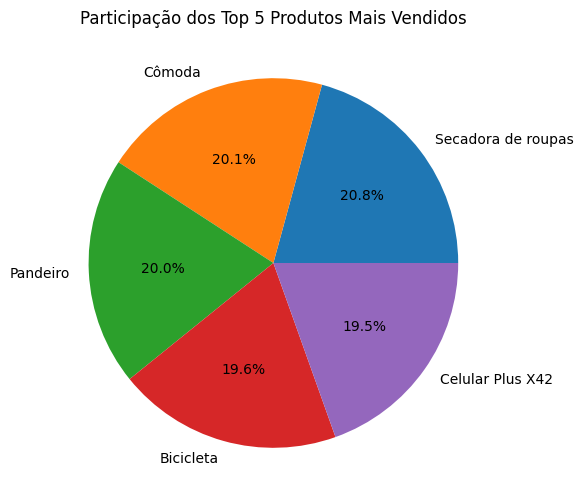

In [44]:
# Gráfico de Pizza para os mais vendidos

top_mais_vendidos.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6, 6),
    title="Participação dos Top 5 Produtos Mais Vendidos",
    ylabel=""
)
plt.show()


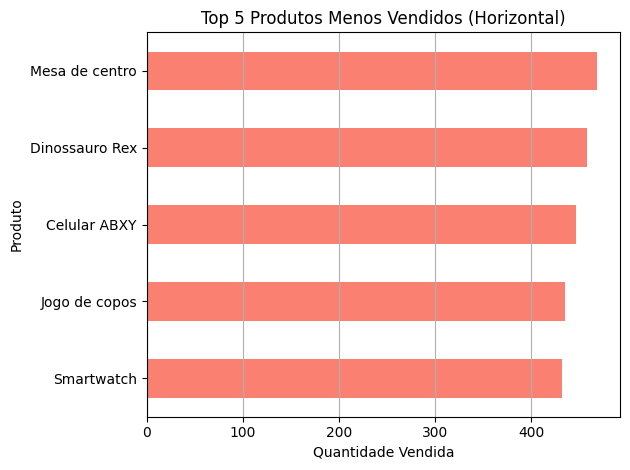

In [46]:
# Gráfico de barras horizontais para os menos vendidos

top_menos_vendidos.sort_values().plot(
    kind="barh",
    color="salmon",
    title="Top 5 Produtos Menos Vendidos (Horizontal)"
)
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.grid(axis="x")
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [ ]:
# Frete médio por loja
frete_medio = dados.groupby("loja")["Frete"].mean().sort_values()

# Gráfico
frete_medio.plot(kind="bar", color="orange", title="Frete Médio por Loja")
plt.xlabel("Loja")
plt.ylabel("Frete Médio (R$)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


In [ ]:
# Gráfico de Linha com Marcadores
frete_medio.plot(
    kind="line",
    marker="o",
    linestyle="--",
    color="darkorange",
    title="Frete Médio por Loja (Linha com Marcadores)",
    figsize=(8, 5)
)
plt.xlabel("Loja")
plt.ylabel("Frete Médio (R$)")
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Gráfico de Barras Horizontais (Barh) 
frete_medio.plot(
    kind="barh",
    color="coral",
    title="Frete Médio por Loja (Horizontal)"
)
plt.xlabel("Frete Médio (R$)")
plt.ylabel("Loja")
plt.grid(axis="x")
plt.tight_layout()
plt.show()
